In [18]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('20250423_scraped_reviews.csv')

In [4]:
df.head()

,Hotel_Name,Hotel_Address,Average_Score,Review_Date,Reviewer_Score,Positive_Review,Negative_Review,Tags
0,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-02-07,9.0,away from the busy streets of pai 12 minute dr...,it was quite cold in the night in the room,"['Leisure trip', 'Solo traveler', 'Holiday Hom..."
1,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-02-06,9.0,relaxing stay walking distance to hot springs ...,cold shower not freezing it didnt bother me to...,"['Leisure trip', 'Couple', 'Tent', 'Stayed 2 n..."
2,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-23,10.0,everything has been good,the only problem is that it gets quite cold at...,"['Leisure trip', 'Solo traveler', 'Double Room..."
3,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-29,7.0,its in a beautiful country setting and the sta...,the shower water was cold only yep there was n...,"['Leisure trip', 'Solo traveler', 'Tent', 'Sta..."
4,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-19,7.0,it have the vibe of pai and its very relaxing ...,its very cold in the evening \nand without a b...,"['Leisure trip', 'Solo traveler', 'Holiday Hom..."


In [5]:
df.describe()

,Average_Score,Reviewer_Score
count,51871.000000,51871.000000
mean,8.431686,8.012011
std,1.181043,2.456718
min,1.000000,1.000000
25%,7.900000,7.000000
50%,8.700000,9.000000
75%,9.300000,10.000000
max,10.000000,10.000000


## Obtain top-n frequency terms

In [6]:
# Prepare text columns
pos_text = df['Positive_Review'].fillna('').str.lower()
neg_text = df['Negative_Review'].fillna('').str.lower()

In [7]:
# Vectorize positive reviews
vec_pos = CountVectorizer(stop_words='english', min_df=5)

pos_mat = vec_pos.fit_transform(pos_text)
pos_counts = pos_mat.sum(axis=0).A1
pos_series = pd.Series(pos_counts, index=vec_pos.get_feature_names_out())

top_pos = pos_series.sort_values(ascending=False).head(25)
top_pos = top_pos.to_dict()

In [8]:
# Vectorize negative reviews
vec_neg = CountVectorizer(stop_words='english', min_df=5)

neg_mat = vec_neg.fit_transform(neg_text)
neg_counts = neg_mat.sum(axis=0).A1
neg_series = pd.Series(neg_counts, index=vec_neg.get_feature_names_out())

top_neg = neg_series.sort_values(ascending=False).head(25)
top_neg = top_neg.to_dict()

In [9]:
# Output
print("Top 25 Positive Terms:\n", top_pos)
print("\nTop 25 Negative Terms:\n", top_neg)

Top 25 Positive Terms:
 {'location': 17508, 'clean': 14736, 'good': 11613, 'great': 10827, 'room': 9194, 'nice': 8847, 'comfortable': 8254, 'stay': 7813, 'staff': 7718, 'place': 5984, 'apartment': 5636, 'friendly': 5402, 'helpful': 4867, 'host': 4370, 'close': 4275, 'really': 4245, 'property': 4133, 'lovely': 4105, 'bed': 3995, 'hotel': 3796, 'breakfast': 3789, 'spacious': 3707, 'perfect': 3662, 'beautiful': 3370, 'quiet': 3318}

Top 25 Negative Terms:
 {'room': 10197, 'didnt': 4588, 'bathroom': 4195, 'like': 4014, 'bit': 3662, 'bed': 3660, 'water': 3660, 'shower': 3575, 'stay': 3487, 'night': 3411, 'good': 3193, 'just': 3101, 'small': 2999, 'hotel': 2949, 'property': 2825, 'door': 2817, 'place': 2787, 'apartment': 2772, 'little': 2446, 'time': 2446, 'did': 2420, 'wasnt': 2387, 'clean': 2272, 'kitchen': 2226, 'really': 2200}


## Identify trend in themes

In [13]:
# Parse dates
df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')
df = df.dropna(subset=['Review_Date'])  # drop any bad dates
df['Month'] = df['Review_Date'].dt.to_period('M')

In [16]:
def label_sentiment(score: int) -> str:
    if score >= 7:
        return 'Positive'
    elif score <= 4:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Reviewer_Score'].apply(label_sentiment)

In [19]:
# Helper to clean text
def clean_text(txt: str) -> str:
    if pd.isna(txt):
        return ""
    return re.sub(r'[^\w\s]', '', txt.lower())

df['PosClean'] = df['Positive_Review'].apply(clean_text)
df['NegClean'] = df['Negative_Review'].apply(clean_text)
df.head()

,Hotel_Name,Hotel_Address,Average_Score,Review_Date,Reviewer_Score,Positive_Review,Negative_Review,Tags,Month,Sentiment,PosClean,NegClean
0,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-02-07,9.0,away from the busy streets of pai 12 minute dr...,it was quite cold in the night in the room,"['Leisure trip', 'Solo traveler', 'Holiday Hom...",2025-02,Positive,away from the busy streets of pai 12 minute dr...,it was quite cold in the night in the room
1,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-02-06,9.0,relaxing stay walking distance to hot springs ...,cold shower not freezing it didnt bother me to...,"['Leisure trip', 'Couple', 'Tent', 'Stayed 2 n...",2025-02,Positive,relaxing stay walking distance to hot springs ...,cold shower not freezing it didnt bother me to...
2,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-23,10.0,everything has been good,the only problem is that it gets quite cold at...,"['Leisure trip', 'Solo traveler', 'Double Room...",2025-01,Positive,everything has been good,the only problem is that it gets quite cold at...
3,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-29,7.0,its in a beautiful country setting and the sta...,the shower water was cold only yep there was n...,"['Leisure trip', 'Solo traveler', 'Tent', 'Sta...",2025-01,Positive,its in a beautiful country setting and the sta...,the shower water was cold only yep there was n...
4,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-19,7.0,it have the vibe of pai and its very relaxing ...,its very cold in the evening \nand without a b...,"['Leisure trip', 'Solo traveler', 'Holiday Hom...",2025-01,Positive,it have the vibe of pai and its very relaxing ...,its very cold in the evening \nand without a b...


In [21]:
# Theme to keyword mapping
themes = {
    'Location':       ["location", "area", "distance", "walk", "situated"],
    'Cleanliness':    ["clean", "dirty", "tidy", "hygiene"],
    'Staff_Service':  ["staff", "service", "helpful", "friendly", "host"],
    'Room_Comfort':   ["bed", "room", "spacious", "comfortable", "small"],
    'Noise':          ["noise", "noisy", "quiet", "loud", "sound"],
    'Food_Breakfast': ["breakfast", "food", "restaurant", "dining"],
    'WiFi':           ["wifi", "internet", "connection"],
}

# Tag each review for each theme (positive & negative)
records = []
for _, row in df.iterrows():
    month = row['Month']
    pos_text = row['PosClean']
    neg_text = row['NegClean']
    for theme, kws in themes.items():
        has_pos = any(kw in pos_text for kw in kws)
        has_neg = any(kw in neg_text for kw in kws)
        if has_pos or has_neg:
            records.append({
                'Month':      month,
                'Theme':      theme,
                'Positive':   int(has_pos),
                'Negative':   int(has_neg)
            })

theme_df = pd.DataFrame(records)
theme_df.head()

,Month,Theme,Positive,Negative
0,2025-02,Room_Comfort,0,1
1,2025-02,Location,1,1
2,2025-02,Staff_Service,1,0
3,2025-02,Room_Comfort,1,1
4,2025-02,Food_Breakfast,1,0


In [34]:
# Aggregate & compute net-sentiment
monthly = (
    theme_df
    .groupby(['Month','Theme'])[['Positive','Negative']]
    .sum()
    .reset_index()
)
monthly['Total']       = monthly['Positive'] + monthly['Negative']
monthly['NetSentiment'] = (monthly['Positive'] - monthly['Negative']) / monthly['Total']
sentiment_by_month = monthly.pivot(index='Month', columns='Theme', values='NetSentiment')

In [33]:
sentiment_by_month

Theme,Cleanliness,Food_Breakfast,Location,Noise,Room_Comfort,Staff_Service,WiFi
Month,,,,,,,
2024-08,0.000000,NaN,-1.000000,NaN,1.000000,NaN,NaN
2024-09,0.617834,0.672727,0.675439,0.069124,0.329466,0.638752,-0.241379
2024-10,0.623327,0.523810,0.690687,0.126615,0.235782,0.619979,-0.242321
2024-11,0.529898,0.412180,0.634093,0.012658,0.139482,0.574650,-0.268765
2024-12,0.504505,0.341414,0.624704,-0.042205,0.090124,0.522489,-0.282851
2025-01,0.480660,0.406136,0.608885,-0.071633,0.094986,0.523590,-0.231660
2025-02,0.504630,0.422711,0.647114,-0.035663,0.100146,0.563656,-0.242798
2025-03,0.515500,0.423654,0.640896,-0.082474,0.110134,0.559904,-0.219638
2025-04,0.473324,0.401294,0.636495,-0.007059,0.108492,0.545617,-0.239437


In [31]:
## TRY TO LOAD THIS SENTIMENT TREND DATA SOMEWHERE

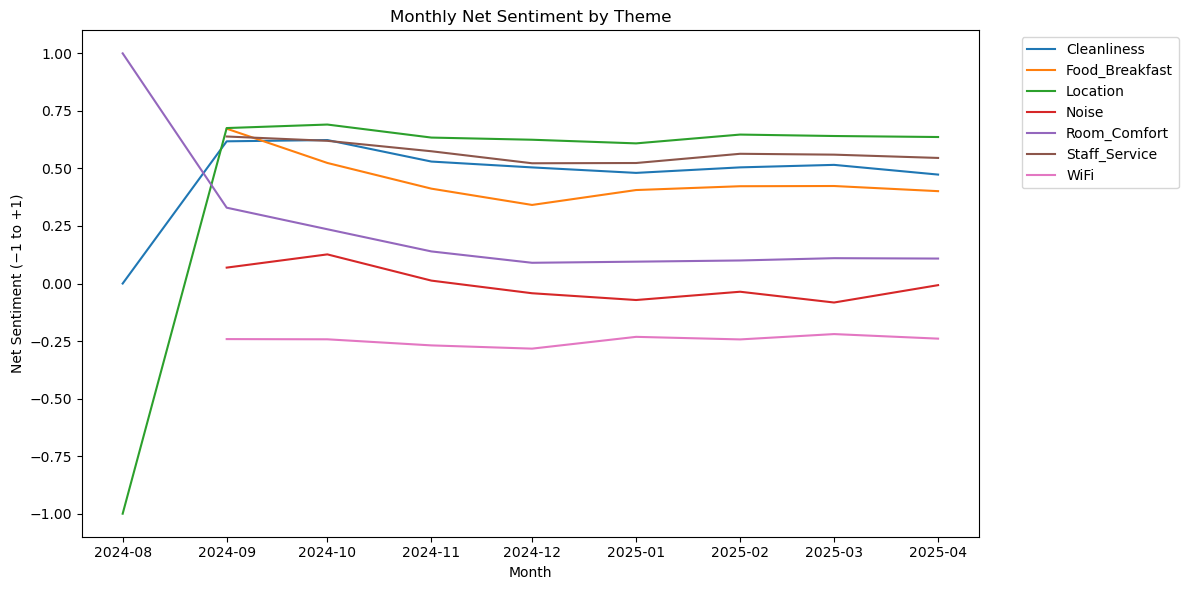

In [43]:
plt.figure(figsize=(12,6))
for theme in sentiment_by_month.columns:
    plt.plot(sentiment_by_month.index.to_timestamp(), sentiment_by_month[theme], label=theme)
plt.title("Monthly Net Sentiment by Theme")
plt.xlabel("Month")
plt.ylabel("Net Sentiment (−1 to +1)")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.show()

## Themes influence on review scores

In [35]:
theme_lexicon = {
    # Location
    'location':     'Location',
    'near':         'Location',
    'downtown':     'Location',
    'airport':      'Location',
    # Cleanliness
    'clean':        'Cleanliness',
    'spotless':     'Cleanliness',
    'housekeeping': 'Cleanliness',
    # Comfort
    'comfortable':  'Comfort',
    'cozy':         'Comfort',
    'bed':          'Comfort',
    'mattress':     'Comfort',
    # Noise
    'noise':        'Noise',
    'quiet':        'Noise',
    'loud':         'Noise',
    # Staff & Service
    'staff':        'Staff & Service',
    'friendly':     'Staff & Service',
    'helpful':      'Staff & Service',
    'host':         'Staff & Service',
    # Food & Beverage
    'breakfast':    'Food & Beverage',
    'coffee':       'Food & Beverage',
    'restaurant':   'Food & Beverage',
    # Bathroom
    'bathroom':     'Bathroom',
    'shower':       'Bathroom',
    'water':        'Bathroom',
    'toilet':       'Bathroom',
    # Room Quality
    'room':         'Room Quality',
    'small':        'Room Quality',
    'spacious':     'Room Quality',
    'kitchen':      'Room Quality',
    # Facilities
    'wifi':         'Facilities',
    'internet':     'Facilities',
    'parking':      'Facilities',
    'pool':         'Facilities',
    'gym':          'Facilities',
    # Value
    'value':        'Value',
    'price':        'Value',
    'expensive':    'Value',
    'cheap':        'Value',
    # Operational
    'check':        'Operational',
    'late':         'Operational',
    'early':        'Operational',
    'delay':        'Operational',
}

In [38]:
# Function to extract all themes mentioned in a block of text
def extract_themes(text, lexicon):
    tokens = re.findall(r'\b\w+\b', text.lower())
    # map each token to its theme (if any), dedupe with set()
    return list({lexicon[t] for t in tokens if t in lexicon})

df['pos_themes'] = df['Positive_Review'].fillna('').apply(lambda t: extract_themes(t, theme_lexicon))
df['neg_themes'] = df['Negative_Review'].fillna('').apply(lambda t: extract_themes(t, theme_lexicon))
df.head()

,Hotel_Name,Hotel_Address,Average_Score,Review_Date,Reviewer_Score,Positive_Review,Negative_Review,Tags,Month,Sentiment,PosClean,NegClean,pos_themes,neg_themes
0,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-02-07,9.0,away from the busy streets of pai 12 minute dr...,it was quite cold in the night in the room,"['Leisure trip', 'Solo traveler', 'Holiday Hom...",2025-02,Positive,away from the busy streets of pai 12 minute dr...,it was quite cold in the night in the room,[],[Room Quality]
1,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-02-06,9.0,relaxing stay walking distance to hot springs ...,cold shower not freezing it didnt bother me to...,"['Leisure trip', 'Couple', 'Tent', 'Stayed 2 n...",2025-02,Positive,relaxing stay walking distance to hot springs ...,cold shower not freezing it didnt bother me to...,"[Staff & Service, Comfort, Room Quality, Bathr...","[Room Quality, Bathroom]"
2,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-23,10.0,everything has been good,the only problem is that it gets quite cold at...,"['Leisure trip', 'Solo traveler', 'Double Room...",2025-01,Positive,everything has been good,the only problem is that it gets quite cold at...,[],"[Operational, Comfort]"
3,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-29,7.0,its in a beautiful country setting and the sta...,the shower water was cold only yep there was n...,"['Leisure trip', 'Solo traveler', 'Tent', 'Sta...",2025-01,Positive,its in a beautiful country setting and the sta...,the shower water was cold only yep there was n...,[Staff & Service],[Bathroom]
4,NichahomePai,108 10 58130 Ban Pa Fang Thailand,8.6,2025-01-19,7.0,it have the vibe of pai and its very relaxing ...,its very cold in the evening \nand without a b...,"['Leisure trip', 'Solo traveler', 'Holiday Hom...",2025-01,Positive,it have the vibe of pai and its very relaxing ...,its very cold in the evening \nand without a b...,[],[]


In [39]:
# Let each row have a review-theme pair
pos_exp = (df[['Reviewer_Score','pos_themes']]
            .explode('pos_themes')
            .dropna(subset=['pos_themes'])
            .rename(columns={'pos_themes':'theme'}))
neg_exp = (df[['Reviewer_Score','neg_themes']]
            .explode('neg_themes')
            .dropna(subset=['neg_themes'])
            .rename(columns={'neg_themes':'theme'}))

In [41]:
# Find the count and mean score per theme for positive and negative
pos_stats = (pos_exp.groupby('theme')
                    .agg(pos_count=('Reviewer_Score','size'),
                         pos_avg_score=('Reviewer_Score','mean')))
neg_stats = (neg_exp.groupby('theme')
                    .agg(neg_count=('Reviewer_Score','size'),
                         neg_avg_score=('Reviewer_Score','mean')))
print(pos_stats.head())
print(neg_stats.head())

                 pos_count  pos_avg_score
theme                                    
Bathroom              4195       8.327533
Cleanliness          14536       8.737411
Comfort              10466       8.729314
Facilities            4479       8.458585
Food & Beverage       5264       8.673442
                 neg_count  neg_avg_score
theme                                    
Bathroom              8248       6.606450
Cleanliness           2125       6.131765
Comfort               3870       6.586563
Facilities            4000       7.295750
Food & Beverage       2770       7.253069


In [42]:
# Combine both of the scores, computing the differences vs overall average
baseline = df['Reviewer_Score'].mean()
theme_df = (pos_stats
              .join(neg_stats, how='outer')
              .fillna(0)
              .assign(
                pos_delta = lambda d: d['pos_avg_score'] - baseline,
                neg_delta = lambda d: d['neg_avg_score'] - baseline
              )
              .sort_values('pos_delta', ascending=False))

print("Baseline reviewer score:", round(baseline,2))
print(theme_df[['pos_count','neg_count','pos_avg_score','neg_avg_score','pos_delta','neg_delta']])

Baseline reviewer score: 8.01
                 pos_count  neg_count  pos_avg_score  neg_avg_score  \
theme                                                                 
Noise                 3568       2409       8.758408       7.069323   
Cleanliness          14536       2125       8.737411       6.131765   
Comfort              10466       3870       8.729314       6.586563   
Staff & Service      14484       3372       8.713270       6.312871   
Food & Beverage       5264       2770       8.673442       7.253069   
Facilities            4479       4000       8.458585       7.295750   
Room Quality         12592      10248       8.436547       6.705211   
Operational           1870       2117       8.424599       6.318847   
Bathroom              4195       8248       8.327533       6.606450   
Value                 3067       1584       8.216824       6.464015   
Location             18622       2409       8.037912       7.233292   

                 pos_delta  neg_delta  
theme 